In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Data Source: CensusIndia.gov.in

In [3]:
#Data on Education:https://censusindia.gov.in/2011census/population_enumeration.html
df = pd.read_excel('https://censusindia.gov.in/2011census/C-series/C-06/DDW-0000C-06.XLSX')
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,"C-6 EVER MARRIED AND CURRENTLY MARRIED POPULATION BY AGE AT MARRIAGE, DURATION OF MARRIAGE AND EDUCATIONAL LEVEL",Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Table,State,Distt.,Area Name,Total/,Educational level,Age at,Number,NaN,Duration of marriage of currently married persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,NaN,Rural/,NaN,marriage,of ever,NaN,All,NaN,0-4,NaN,5-9,NaN,10-19,NaN,20-29,NaN,30-39,NaN,40+,NaN,Duration,NaN
2,NaN,NaN,NaN,NaN,Urban,NaN,NaN,married persons,NaN,durations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not known,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females
4,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C1706,00,000,INDIA,Total,Total,All ages,300399731,339621277,286507311,293077472,35274698,37626730,38198243,39768834,72875228,75983591,58626709,59744823,34791780,34856304,30573397,29913924,16167256,15183266
7,C1706,00,000,INDIA,Total,Total,Less than 10,4276588,7849859,4086884,6783333,9858,22116,22976,57805,361574,1504612,1204363,1875784,980050,1409001,1493782,1885059,14281,28956
8,C1706,00,000,INDIA,Total,Total,10-11,979213,3434492,877093,2764658,18682,45208,33592,117945,161717,567458,205577,604848,160518,507417,292361,907532,4646,14250
9,C1706,00,000,INDIA,Total,Total,12-13,1144889,7717216,1004580,6013506,37693,137058,56524,383186,197901,1375290,222892,1366853,174284,1096281,311596,1635744,3690,19094


In [4]:
df.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head(7)

,Unnamed: 5,"C-6 EVER MARRIED AND CURRENTLY MARRIED POPULATION BY AGE AT MARRIAGE, DURATION OF MARRIAGE AND EDUCATIONAL LEVEL",Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Educational level,Age at,Number,NaN,Duration of marriage of currently married persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,marriage,of ever,NaN,All,NaN,0-4,NaN,5-9,NaN,10-19,NaN,20-29,NaN,30-39,NaN,40+,NaN,Duration,NaN
2,NaN,NaN,married persons,NaN,durations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not known,NaN
3,NaN,NaN,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females
4,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Total,All ages,300399731,339621277,286507311,293077472,35274698,37626730,38198243,39768834,72875228,75983591,58626709,59744823,34791780,34856304,30573397,29913924,16167256,15183266


In [5]:
df.columns

Index(['Unnamed: 5',
       'C-6 EVER MARRIED AND CURRENTLY MARRIED POPULATION BY AGE AT MARRIAGE, DURATION OF MARRIAGE AND EDUCATIONAL LEVEL',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24'],
      dtype='object')

In [6]:
df1 = df[df.columns[0:4]]
df1.head()

,Unnamed: 5,"C-6 EVER MARRIED AND CURRENTLY MARRIED POPULATION BY AGE AT MARRIAGE, DURATION OF MARRIAGE AND EDUCATIONAL LEVEL",Unnamed: 7,Unnamed: 8
0,Educational level,Age at,Number,NaN
1,NaN,marriage,of ever,NaN
2,NaN,NaN,married persons,NaN
3,NaN,NaN,Males,Females
4,NaN,1,2,3


In [7]:
df1.columns = ['Educational_level','Age_at_marriage','N_males','N_females']
df1.head()

,Educational_level,Age_at_marriage,N_males,N_females
0,Educational level,Age at,Number,NaN
1,NaN,marriage,of ever,NaN
2,NaN,NaN,married persons,NaN
3,NaN,NaN,Males,Females
4,NaN,1,2,3


In [8]:
df1.drop([0,1,2,3,4,5],axis=0,inplace=True)
df1.reset_index(inplace=True)
del df1['index']
df1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Educational_level,Age_at_marriage,N_males,N_females
0,Total,All ages,300399731,339621277
1,Total,Less than 10,4276588,7849859
2,Total,10-11,979213,3434492
3,Total,12-13,1144889,7717216
4,Total,14-15,3900762,28124694


In [10]:
df1.tail(6)

,Educational_level,Age_at_marriage,N_males,N_females
13821,Graduate and above,32-33,470,91
13822,Graduate and above,34+,412,72
13823,Graduate and above,Age Not stated,205,178
13824,NaN,NaN,NaN,NaN
13825,NaN,NaN,NaN,NaN
13826,NaN,NaN,NaN,NaN


In [11]:
df1['Educational_level'].isnull().sum()

3

In [12]:
df1.drop(df1.tail(3).index,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.tail()

,Educational_level,Age_at_marriage,N_males,N_females
13819,Graduate and above,28-29,1162,411
13820,Graduate and above,30-31,808,175
13821,Graduate and above,32-33,470,91
13822,Graduate and above,34+,412,72
13823,Graduate and above,Age Not stated,205,178


In [ ]:
df1['N_females'] = df1['N_females'].astype('int')
df1['N_males'] = df1['N_males'].astype('int')

In [ ]:
import matplotlib.pyplot as plt

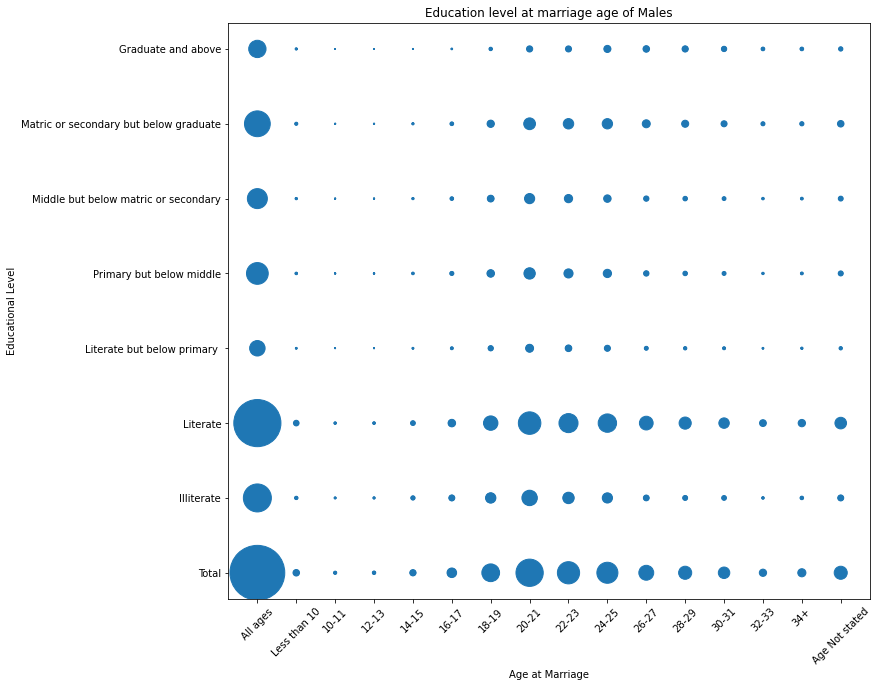

In [ ]:
scatter = plt.scatter(y = df1['Educational_level'], x = df1['Age_at_marriage'],
                      s = 0.00001*df1['N_males'])
plt.xticks(rotation = 45)
fig = plt.gcf() #Get the current figure
fig.set_size_inches(11.5, 10.6)
fig.savefig('xyz.png', dpi=100)
plt.xlabel('Age at Marriage')
plt.ylabel('Educational Level')
plt.title('Education level at marriage age of Males')
# plt.legend(*scatter.legend_elements("sizes", num=16),bbox_to_anchor=(1.1, 1.05))
fig.show()

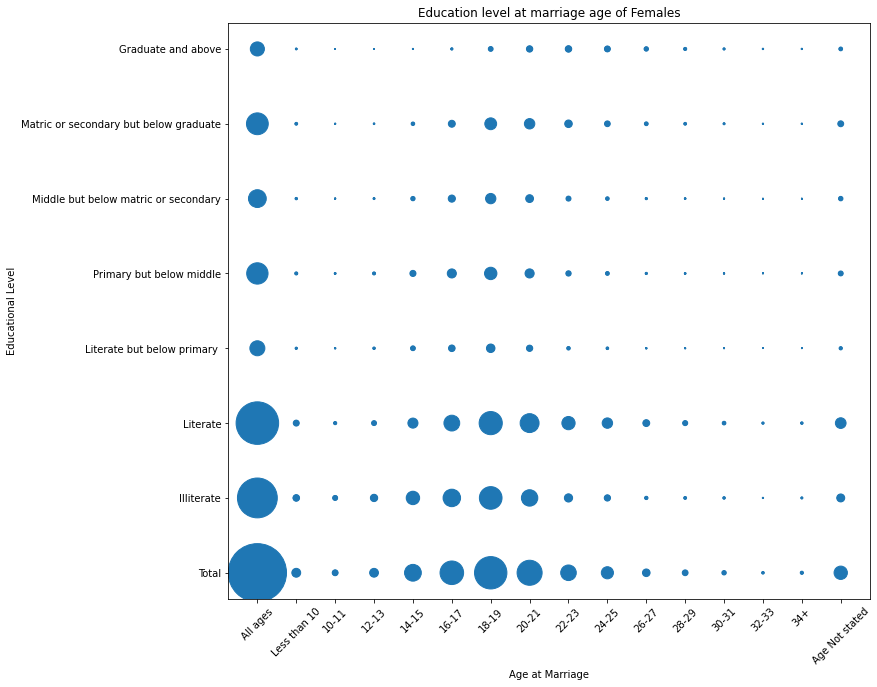

In [ ]:
scatter = plt.scatter(y = df1['Educational_level'], x = df1['Age_at_marriage'],
                      s = 0.00001*df1['N_females'])
plt.xticks(rotation = 45)
fig = plt.gcf() #Get the current figure
fig.set_size_inches(11.5, 10.6)
fig.savefig('xyz.png', dpi=100)
plt.xlabel('Age at Marriage')
plt.ylabel('Educational Level')
plt.title('Education level at marriage age of Females')
# plt.legend(*scatter.legend_elements("sizes", num=16),bbox_to_anchor=(1.1, 1.05))
fig.show()